In [12]:
library(ggplot2)
library(maps)
library(readr)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
LAT1 = 72 ; LAT2 = 34
LON1 = -12 ; LON2 = 40

In [9]:
occurrences <- read_tsv("./data/GBIF_Strix.zip")
occurrences <- occurrences[
  !is.na(occurrences$decimalLatitude) &
  !is.na(occurrences$decimalLongitude), ]

Parsed with column specification:
cols(
  .default = col_character(),
  gbifID = col_double(),
  individualCount = col_double(),
  decimalLatitude = col_double(),
  decimalLongitude = col_double(),
  coordinateUncertaintyInMeters = col_double(),
  coordinatePrecision = col_logical(),
  elevation = col_double(),
  elevationAccuracy = col_logical(),
  depth = col_logical(),
  depthAccuracy = col_logical(),
  eventDate = col_datetime(format = ""),
  day = col_double(),
  month = col_double(),
  year = col_double(),
  taxonKey = col_double(),
  speciesKey = col_double(),
  dateIdentified = col_datetime(format = ""),
  typeStatus = col_logical(),
  establishmentMeans = col_logical(),
  lastInterpreted = col_datetime(format = "")
)

See spec(...) for full column specifications.

Warning message:
“7238 parsing failures.
 row               col           expected actual                    file
  44 locality          delimiter or quote    C   './data/GBIF_Strix.zip'
  44 locality          delimi

In [133]:
occurrences.sampled <-
   occurrences[sample(nrow(occurrences), 50000),]

In [140]:
occurrences.sampled$x = round(occurrences.sampled$decimalLongitude)
occurrences.sampled$y = round(occurrences.sampled$decimalLatitude)
strix.dist <- occurrences.sampled %>%
    group_by(x,y) %>%
    tally()

In [15]:
world_df <- map_data("world")

In [141]:
map <- ggplot(strix.dist) +
    geom_tile(aes(x, y, fill=log(n))) +
    geom_path(aes(x = long, y = lat, group=group), data = world_df) +
    xlim(c(LON1, LON2)) + ylim(c(LAT2, LAT1)) + 
    theme_bw() +
    labs(x="Longitude", y="Latitude")

In [143]:
scale <- scale_fill_gradientn(
    colors=c("white", "yellow", "red"), guide=FALSE)

In [49]:
proj <- coord_map(projection="albers", parameters=c(mean(LON2, LON1), mean(LAT1, LAT2)))

Warning message:
“Removed 84 rows containing missing values (geom_tile).”
Warning message:
“Removed 84110 row(s) containing missing values (geom_path).”


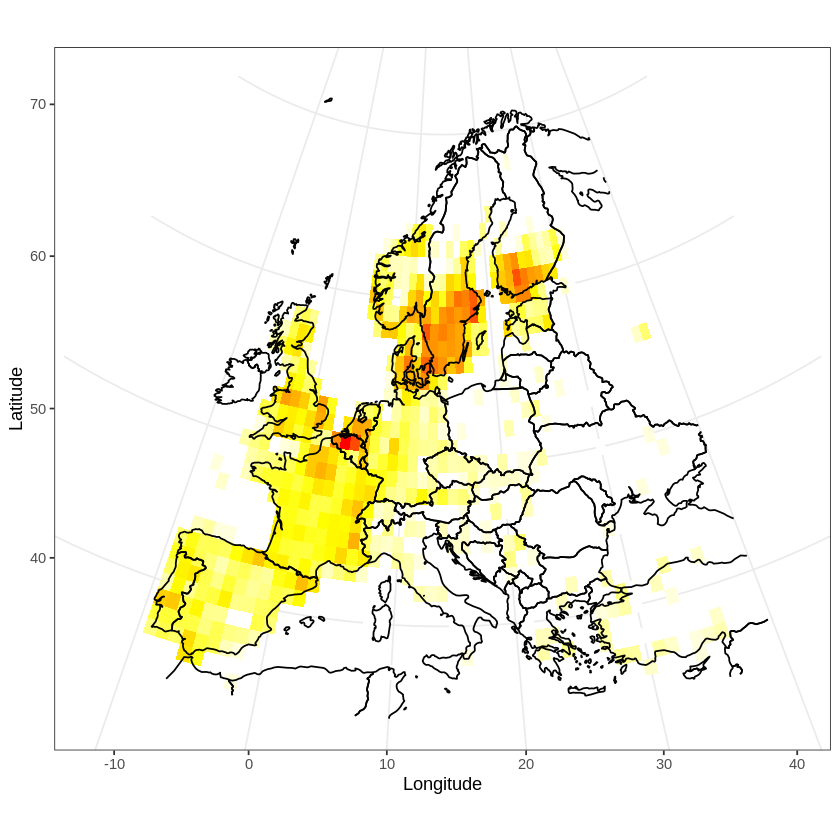

In [144]:
map + scale + proj

In [48]:
c(mean(LON2, LON1), mean(LAT1, LAT2))

[1] 40 72